beta_VIA =  0.180970585787
alpha_VIA=  -0.0019316536483


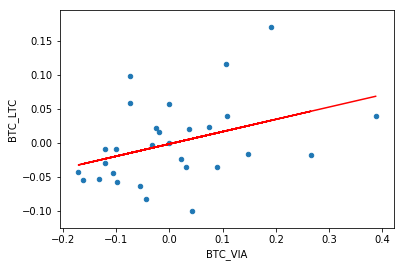

beta_LTC =  0.180970585787
alpha_LTC=  -0.0019316536483


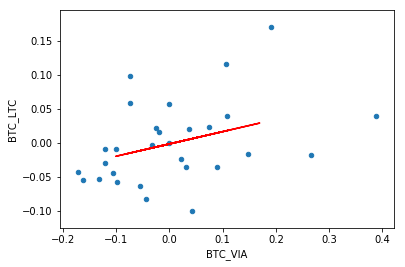

(:


In [1]:
""" plot a scatter plot """

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def make_scatter():
    dates = pd.date_range('2017-08-03', '2017-08-31')
    
    a = {'via': 'BTC_VIA', 'ltc': 'BTC_LTC', 'pink': 'BTC_PINK'}
    
    currencies = [a['via'], a['ltc'], a['pink']]
    
    df = get_data(currencies, dates)
    
    daily_returns = compute_daily_return(df)
    
    daily_returns.plot(kind='scatter', x=a['via'], y=a['ltc'])
    beta_VIA, alpha_VIA = np.polyfit(daily_returns[a['via']], daily_returns[a['ltc']], 1)
    print("beta_VIA = ", beta_VIA)
    print('alpha_VIA= ', alpha_VIA)
    plt.plot(daily_returns[a['via']], beta_VIA * daily_returns[a['via']] + alpha_VIA, '-', color='r')
    plt.show()
    
    
    daily_returns.plot(kind='scatter', x=a['via'], y=a['ltc'])
    beta_LTC, alpha_LTC = np.polyfit(daily_returns[a['via']], daily_returns[a['ltc']], 1)
    print("beta_LTC = ", beta_LTC)
    print('alpha_LTC= ', alpha_LTC)
    plt.plot(daily_returns[a['ltc']], beta_LTC * daily_returns[a['ltc']] + alpha_LTC, '-', color='r')
    plt.show()
    
    return None


def get_data(currencies, dates):
    df1 = pd.DataFrame(index=dates)
    for currency in currencies:
        df_currency = pd.read_csv('data/{}.csv'.format(currency), index_col="date", parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_currency = df_currency.rename(columns={'close': currency})
        df1 = df1.join(df_currency)
    return df1
    
    
def compute_daily_return(df):
    daily_returns = (df/ df.shift(1)) - 1
    daily_returns.iloc[0, :] = 0
    return daily_returns
    
    
if __name__ == "__main__":
    make_scatter()
    print('(:')
    

## 